In [1]:
%pip install numpy pandas matplotlib tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [4]:
# Define the directories
base_dir = 'flowers'
rose_dir = os.path.join(base_dir, 'rose')
sunflower_dir = os.path.join(base_dir, 'sunflower')

# Create lists to store the images and labels
images = []
labels = []

# Define a function to load images
def load_images_from_folder(folder, label):
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label)

# Load images from the directories
load_images_from_folder(rose_dir, 0)  # Label for roses is 0
load_images_from_folder(sunflower_dir, 1)  # Label for sunflowers is 1

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 344ms/step - accuracy: 0.6275 - loss: 0.9855 - val_accuracy: 0.8750 - val_loss: 0.2873
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 378ms/step - accuracy: 0.8866 - loss: 0.2752 - val_accuracy: 0.8914 - val_loss: 0.2725
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 372ms/step - accuracy: 0.9028 - loss: 0.2498 - val_accuracy: 0.9079 - val_loss: 0.2244
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 363ms/step - accuracy: 0.9115 - loss: 0.2206 - val_accuracy: 0.9145 - val_loss: 0.2012
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 366ms/step - accuracy: 0.9186 - loss: 0.1858 - val_accuracy: 0.9046 - val_loss: 0.2176
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 353ms/step - accuracy: 0.9254 - loss: 0.1948 - val_accuracy: 0.9178 - val_loss: 0.2155
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 363ms/step - accuracy: 0.9471 - loss: 0.1296 - val_accuracy: 0.9013 - val_loss: 0.2804
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 369ms/step - accuracy: 0.9545 - loss: 0.1172 - val_accu

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9009 - loss: 0.2617
Test Accuracy: 0.9078947305679321
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
              precision    recall  f1-score   support

        Rose       0.90      0.92      0.91       154
   Sunflower       0.92      0.89      0.91       150

    accuracy                           0.91       304
   macro avg       0.91      0.91      0.91       304
weighted avg       0.91      0.91      0.91       304

[[142  12]
 [ 16 134]]


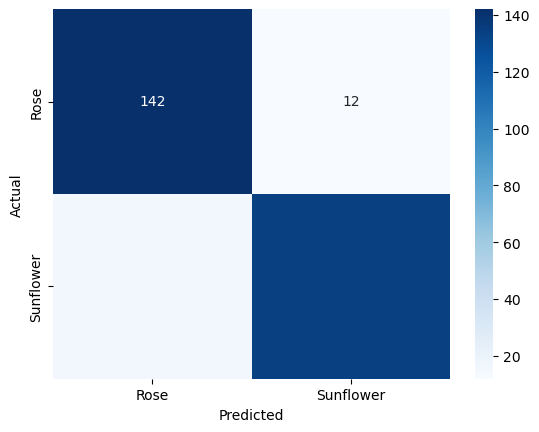

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred, target_names=['Rose', 'Sunflower']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rose', 'Sunflower'], yticklabels=['Rose', 'Sunflower'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

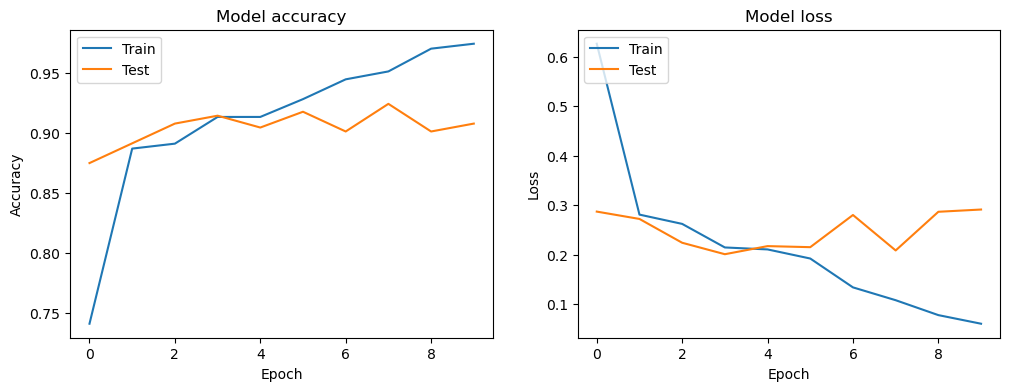

In [10]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [11]:
# Prediction function
def predict_flower(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Make a prediction
    prediction = model.predict(img_array)
    
    # Convert prediction to class name
    if prediction > 0.5:
        return "Sunflower"
    else:
        return "Rose"

In [12]:
# Checking_01
image_path = 'flowers/sunflower/24459548_27a783feda.jpg' 
result = predict_flower(image_path)
print(f'The image is a {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The image is a Sunflower


In [13]:
# Checking_02
image_path = 'flowers/rose/102501987_3cdb8e5394_n.jpg' 
result = predict_flower(image_path)
print(f'The image is a {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The image is a Rose
